In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir

from tensorflow.keras.preprocessing import sequence
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import keras
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
from keras import backend as K
K.clear_session()

from keras.layers import Dense,BatchNormalization,Dropout
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
from keras.utils import to_categorical

from keras import regularizers
from collections import Counter
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
df1 = pd.read_csv(r'Voltage_L1_DataSet1.csv')
df2 = pd.read_csv(r'Voltage_L1_DataSet2.csv')

In [ ]:
df1.columns = np.arange(len(df1.columns))
df2.columns = np.arange(len(df2.columns))

In [ ]:
df1.dropna(how='all', inplace = True)
#df2.dropna(how='all', inplace = True)
print(df1.shape)
print(df2.shape)
df1.head()

(5999, 128)
(5999, 128)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,-797.962914,-1320.199586,-1828.741445,-2319.935857,-2789.218649,-3231.111864,-3641.962908,-4018.119193,-4355.929647,-4650.829055,-4904.643864,-5107.330184,-5261.626825,-5366.622879,-5418.663525,-5419.576973,-5367.535249,-5264.365732,-5110.069166,-4906.470001,-4656.307539,-4364.146538,-4024.510575,-3650.179436,-3239.328934,-2797.436518,-2329.066729,-1837.871278,-1329.329968,-808.005760,-278.465093,252.902023,782.442935,1303.766529,1812.308746,2303.502822,2772.785644,3215.592255,3626.442570,4002.599102,...,-3239.328487,-2797.435948,-2329.066521,-1837.871910,-1329.329479,-808.005477,-279.377475,252.901869,781.530215,1303.767033,1812.308177,2304.416161,2773.699506,3215.591849,3627.355635,4002.598697,4340.409797,4635.308762,4889.123899,5091.809794,5246.107486,5351.102295,5403.143675,5403.143732,5351.102775,5247.932927,5093.636278,4889.123913,4639.874673,4346.800923,4008.077109,3632.834002,3221.982426,2780.090228,2311.720161,1821.438861,1311.983509,790.659456,262.031836,-269.335205
1,4387.885674,4567.747164,4693.741356,4776.824895,4824.300958,4850.777519,4862.646175,4867.211521,4866.298624,4858.081691,4839.821272,4801.475225,4735.739730,4633.482680,4480.098867,4263.717062,3982.513234,3625.529989,3194.592586,2690.615580,2121.815686,1499.149171,836.309474,150.645858,-539.583464,-1214.291896,-1857.957949,-2453.234297,-2987.340713,-3452.058138,-3842.822995,-4158.721282,-4403.405653,-4583.267220,-4709.261054,-4793.257930,-4839.820962,-4866.297128,-4879.079514,-4882.731612,...,-542.322021,-1217.030331,-1860.696745,-2455.060932,-2989.166228,-3453.883859,-3844.648379,-4159.634438,-4404.318373,-4583.266716,-4709.261622,-4793.257592,-4839.820102,-4866.297534,-4879.079451,-4882.732017,-4881.818474,-4873.601984,-4855.341237,-4817.908616,-4751.259069,-4649.003265,-4496.531718,-4279.237302,-3998.032706,-3641.049793,-3210.112473,-2706.135664,-2137.335549,-1514.668783,-850.916937,-165.252287,524.062959,1199.684611,1842.437384,2437.714882,2972.733259,3437.450839,3828.215741,4143.201102
2,-4050.074299,-4340.408587,-4576.875995,-4769.518913,-4918.338175,-5025.159834,-5100.026323,-5141.111052,-5153.892968,-5137.458861,-5091.809174,-5014.204029,-4900.078226,-4746.694853,-4552.225090,-4306.628130,-4008.988999,-3659.309075,-3255.763095,-2801.088514,-2298.024633,-1753.875216,-1176.858860,-577.929348,31.955483,640.927176,1237.117177,1809.569762,2349.153124,2845.826291,3295.022824,3691.265717,4034.554320,4323.975530,4561.356298,4753.998880,4902.818171,5009.640226,5084.505985,5125.590961,...,30.129927,640.014744,1236.204383,1808.656128,2348.240611,2844.913572,3294.110443,3691.265562,4033.641600,4323.976034,4561.355729,4753.999218,4902.819032,5009.639820,5083.593047,5125.590557,5138.373119,5121.938568,5076.289209,4998.683639,4884.558887,4730.261267,4536.705240,4291.107890,3993.469527,3643.789270,3240.243209,2784.655428,2281.591768,1738.355604,1161.338395,563.322919,-47.475988,-656.447463,-1252.637741,-1825.089177,-2364.673580,-2861.346591,-3309.630078,-3706.785897
3,3458.450134,3686.700705,4000.773209,4392.451258,4834.343975,5269.845213,5636.871457,5876.078192,5950.944421,5841.384319,5574.787489,5187.674864,4745.782747,4310.280145,3932.297960,3637.398025,3422.843307,3256.677378,3089.597412,2864.998869,2526.275355,2051.515086,1433.412463,704.837776,-84.908711,-866.438320,-1578.579486,-2169.290827,-2616.662099,-2928.908272,-3138.898830,-3303.238866,-3473.970114,-3702.220761,-4015.379905,-4406.145289,-4848.037975,-5283.538819,-5651.478793,-5891.598282,...,-83.995262,-865.524749,-1577.666277,-2169.291459,-2617.574612,-2928.907989,-3138.898210,-3303.239020,-3473.969832,-3702.220257,-4015.380473,-4407.057953,-4848.037115,-5283.539225,-5650.565728,-5890.685686,-5966.464270,-5857.817614,-5592.133458,-5205.02

In [ ]:
t1 = pd.read_csv(r'OutputFor_DataSet1.csv')
t2 = pd.read_csv(r'OutputFor_DataSet2.csv')

In [ ]:
t1.columns = ['target']
t2.columns = ['target']
print(t1.shape)
print(t2.shape)
df1['target'] = t1
df2['target'] = t2

(5999, 1)
(5999, 1)


In [ ]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,target
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,...,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000
mean,-114.725650,-115.527708,-126.112360,-132.032136,-136.704447,-141.935573,-140.543493,-148.074137,-151.656233,-151.216996,-150.110683,-148.324022,-155.060516,-152.998291,-146.640704,-143.917558,-139.383508,-131.600967,-127.246435,-121.619322,-113.039008,-110.478671,-101.907954,-92.915332,-79.308630,-79.396437,-67.609323,-56.682444,-50.288095,-34.694330,-20.108317,-13.929643,-12.972290,-6.696286,-0.618427,10.899763,18.296962,23.424606,27.645966,28.355499,...,-23.629376,-24.406372,-21.572649,-11.841742,-7.049046,-3.258422,1.151911,11.578695,18.961142,25.876065,33.238111,41.374223,49.421060,54.551175,56.392409,60.092876,75.126937,82.055212,86.668294,91.959960,98.077744,104.992452,111.051529,119.825115,126.854118,131.874435,132.129714,138.788062,145.936179,146.831518,152.991787,158.859205,162.352721,161.162793,163.662182,160.971389,156.814956,160.660116,149.550040,3.167028
std,4161.446816,4158.073346,4147.189662,4145.574877,4138.286796,4142.798449,4141.431760,4127.741826,4115.027973,4106.023447,4097.108911,4092.987618,4080.400646,4075.579711,4067.617308,4054.029633,4050.877334,4049.828071,4035.257338,4029.598680,4033.029087,4026.856665,4029.824397,4032.529267,4029.565201,4033.027680,4035.943930,4041.915977,4045.777910,4048.148249,4047.846148,4044.673887,4051.586594,4056.520051,4050.547657,4058.016866,4057.822252,4044.985899,4052.224383,4041.444446,...,4009.278098,4014.277079,4022.046258,4025.343377,4027.587735,4031.912007,4043.162924,4041.920091,4048.591813,4052.942752,4053.262909,4058.256221,4054.321852,4055.173782,4057.107309,4052.323972,4052.317167,4043.411406,4044.222471,4046.679083,4044.054613,4047.115512,4045.024272,4046.507354,4050.384826,4047.751336,4047.469645,4052.089380,4055.809144,4063.864101,4072.775492,4083.708212,4092.957306,4102.078879,4110.569834,4114.955656,4126.345999,4130.068579,4136.623246,1.404314
min,-7141.830542,-7045.699667,-7073.957462,-7132.801634,-7108.402036,-7126.645918,-7001.727133,-7090.700202,-7112.356784,-7072.899446,-7128.268195,-6998.465183,-7035.872427,-7125.278595,-7184.126245,-7071.719736,-7161.582101,-7031.171860,-7042.861531,-7132.357863,-7002.480030,-7067.784583,-7116.963289,-6987.365883,-7024.374970,-7114.738185,-7070.833136,-7161.793897,-7031.379542,-6948.831863,-7084.546755,-7175.684320,-7045.017440,-7085.637268,-7175.675988,-7045.009328,-7099.842027,-7061.962522,-7152.809002,-7101.292081,...,-7114.738466,-7071.928458,-7161.794070,-7030.284436,-6948.832156,-7085.644495,-7175.683857,-7043.919000,-7084.539054,-7175.675810,-7045.010017,-7099.841926,-7063.056170,-7152.808720,-7101.292398,-7048.325565,-7061.059757,-7117.889307,-7179.089133,-7048.361074,-7124.885331,-6994.053168,-7094.305654,-7185.568806,-7175.660203,-7043.895540,-7125.971639,-7178.973510,-7067.268198,-7091.17

In [ ]:
df3 = df1.append(df2, ignore_index=True)
class1 = df3[df3['target']==1]
class2 = df3[df3['target']==2]
class3 = df3[df3['target']==3]
class4 = df3[df3['target']==4]
class5 = df3[df3['target']==5]
print(df3.shape)
df3.head()

(11998, 129)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,target
0,-797.962914,-1320.199586,-1828.741445,-2319.935857,-2789.218649,-3231.111864,-3641.962908,-4018.119193,-4355.929647,-4650.829055,-4904.643864,-5107.330184,-5261.626825,-5366.622879,-5418.663525,-5419.576973,-5367.535249,-5264.365732,-5110.069166,-4906.470001,-4656.307539,-4364.146538,-4024.510575,-3650.179436,-3239.328934,-2797.436518,-2329.066729,-1837.871278,-1329.329968,-808.005760,-278.465093,252.902023,782.442935,1303.766529,1812.308746,2303.502822,2772.785644,3215.592255,3626.442570,4002.599102,...,-2797.435948,-2329.066521,-1837.871910,-1329.329479,-808.005477,-279.377475,252.901869,781.530215,1303.767033,1812.308177,2304.416161,2773.699506,3215.591849,3627.355635,4002.598697,4340.409797,4635.308762,4889.123899,5091.809794,5246.107486,5351.102295,5403.143675,5403.143732,5351.102775,5247.932927,5093.636278,4889.123913,4639.874673,4346.800923,4008.077109,3632.834002,3221.982426,2780.090228,2311.720161,1821.438861,1311.983509,790.659456,262.031836,-269.335205,1
1,4387.885674,4567.747164,4693.741356,4776.824895,4824.300958,4850.777519,4862.646175,4867.211521,4866.298624,4858.081691,4839.821272,4801.475225,4735.739730,4633.482680,4480.098867,4263.717062,3982.513234,3625.529989,3194.592586,2690.615580,2121.815686,1499.149171,836.309474,150.645858,-539.583464,-1214.291896,-1857.957949,-2453.234297,-2987.340713,-3452.058138,-3842.822995,-4158.721282,-4403.405653,-4583.267220,-4709.261054,-4793.257930,-4839.820962,-4866.297128,-4879.079514,-4882.731612,...,-1217.030331,-1860.696745,-2455.060932,-2989.166228,-3453.883859,-3844.648379,-4159.634438,-4404.318373,-4583.266716,-4709.261622,-4793.257592,-4839.820102,-4866.297534,-4879.079451,-4882.732017,-4881.818474,-4873.601984,-4855.341237,-4817.908616,-4751.259069,-4649.003265,-4496.531718,-4279.237302,-3998.032706,-3641.049793,-3210.112473,-2706.135664,-2137.335549,-1514.668783,-850.916937,-165.252287,524.062959,1199.684611,1842.437384,2437.714882,2972.733259,3437.450839,3828.215741,4143.201102,2
2,-4050.074299,-4340.408587,-4576.875995,-4769.518913,-4918.338175,-5025.159834,-5100.026323,-5141.111052,-5153.892968,-5137.458861,-5091.809174,-5014.204029,-4900.078226,-4746.694853,-4552.225090,-4306.628130,-4008.988999,-3659.309075,-3255.763095,-2801.088514,-2298.024633,-1753.875216,-1176.858860,-577.929348,31.955483,640.927176,1237.117177,1809.569762,2349.153124,2845.826291,3295.022824,3691.265717,4034.554320,4323.975530,4561.356298,4753.998880,4902.818171,5009.640226,5084.505985,5125.590961,...,640.014744,1236.204383,1808.656128,2348.240611,2844.913572,3294.110443,3691.265562,4033.641600,4323.976034,4561.355729,4753.999218,4902.819032,5009.639820,5083.593047,5125.590557,5138.373119,5121.938568,5076.289209,4998.683639,4884.558887,4730.261267,4536.705240,4291.107890,3993.469527,3643.789270,3240.243209,2784.655428,2281.591768,1738.355604,1161.338395,563.322919,-47.475988,-656.447463,-1252.637741,-1825.089177,-2364.673580,-2861.346591,-3309.630078,-3706.785897,2
3,3458.450134,3686.700705,4000.773209,4392.451258,4834.343975,5269.845213,5636.871457,5876.078192,5950.944421,5841.384319,5574.787489,5187.674864,4745.782747,4310.280145,3932.297960,3637.398025,3422.843307,3256.677378,3089.597412,2864.998869,2526.275355,2051.515086,1433.412463,704.837776,-84.908711,-866.438320,-1578.579486,-2169.290827,-2616.662099,-2928.908272,-3138.898830,-3303.238866,-3473.970114,-3702.220761,-4015.379905,-4406.145289,-4848.037975,-5283.538819,-5651.478793,-5891.598282,...,-865.524749,-1577.666277,-2169.291459,-2617.574612,-2928.907989,-3138.898210,-3303.239020,-3473.969832,-3702.220257,-4015.380473,-4407.057953,-4848.037115,-5283.539225,-5650.565728,-5890.685686,-5966.464270,-5857.817614,-5592.133458,-5205.021257,-4764.041090,-4328.539734,-3949

In [ ]:
X = df3.iloc[:,0:128]
y = df3.iloc[:,128]

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
Y = pd.get_dummies(y)
Y

,1,2,3,4,5
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
11993,0,0,0,1,0
11994,0,0,0,1,0
11995,0,0,0,0,1
11996,0,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size=0.25)

num_classes = len(np.unique(y_t))
print(num_classes)

5


In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(32,input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(64,activation='relu'))
NN_model.add(Dense(64,activation='relu'))
NN_model.add(Dense(64 ,activation='relu'))
NN_model.add(Dense(32,kernel_regularizer=keras.regularizers.l2() ,activation='relu'))

# The Output Layer :
NN_model.add(Dense(num_classes,activation='softmax'))

# Compile the network :
sgd = keras.optimizers.SGD(lr=0.01)
NN_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 165       
Total params: 16,805
Trainable params: 16,805
Non-trainable params: 0
____________________________________________________

In [ ]:
ACCURACY_THRESHOLD = 0.99
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
      if(logs.get('accuracy') > ACCURACY_THRESHOLD):     
        print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))   
        self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = NN_model.fit(X, Y, epochs=1000, batch_size=64, validation_split = 0.25, callbacks=[callbacks])

Epoch 1/1000
141/141 [==============================] - 3s 5ms/step - loss: 1.7911 - accuracy: 0.3119 - val_loss: 1.2720 - val_accuracy: 0.4167
Epoch 2/1000
141/141 [==============================] - 0s 3ms/step - loss: 1.2357 - accuracy: 0.4379 - val_loss: 1.1940 - val_accuracy: 0.4317
Epoch 3/1000
141/141 [==============================] - 0s 3ms/step - loss: 1.2023 - accuracy: 0.4226 - val_loss: 1.2776 - val_accuracy: 0.3980
Epoch 4/1000
141/141 [==============================] - 0s 3ms/step - loss: 1.1779 - accuracy: 0.4226 - val_loss: 1.1702 - val_accuracy: 0.4137
Epoch 5/1000
141/141 [==============================] - 1s 4ms/step - loss: 1.1640 - accuracy: 0.4195 - val_loss: 1.1633 - val_accuracy: 0.4290
Epoch 6/1000
141/141 [==============================] - 0s 3ms/step - loss: 1.1526 - accuracy: 0.4324 - val_loss: 1.1585 - val_accuracy: 0.4273
Epoch 7/1000
141/141 [==============================] - 0s 3ms/step - loss: 1.1502 - accuracy: 0.4308 - val_loss: 1.3404 - val_accuracy:

In [ ]:
NN_model.save("model_11.h5")
NN_model.save("model_12.h")
NN_model.save("model_13.tflite")


INFO:tensorflow:Assets written to: model_12.h/assets
INFO:tensorflow:Assets written to: model_13.tflite/assets


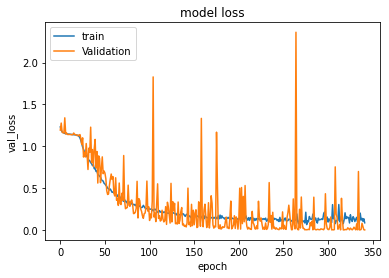

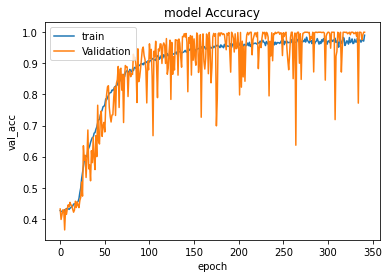

In [ ]:
def plot_loss_acc(history):
    plt.plot(history.history['loss'][1:])
    plt.plot(history.history['val_loss'][1:])
    plt.title('model loss')
    plt.ylabel('val_loss')
    plt.xlabel('epoch')
    plt.legend(['train','Validation'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['accuracy'][1:])
    plt.plot(history.history['val_accuracy'][1:])
    plt.title('model Accuracy')
    plt.ylabel('val_acc')
    plt.xlabel('epoch')
    plt.legend(['train','Validation'], loc='upper left')
    plt.show()
    
plot_loss_acc(history)

In [61]:
x = np.array(X[:])
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.25,random_state = 120)

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

input_shape=(x_train.shape[1], 1)
print(input_shape)

(128, 1)


In [ ]:
model4 = Sequential()

model4.add(Conv1D(filters=32, kernel_size=3, input_shape=input_shape,activation='relu'))
model4.add(MaxPooling1D(pool_size=2))
model4.add(Conv1D(filters=32, kernel_size=10, padding='same', activation='relu'))
model4.add(MaxPooling1D(pool_size=2))
model4.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model4.add(Dense(32, activation='relu'))
model4.add(Dense(num_classes,activation='softmax'))

model4.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

history = model4.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test), callbacks=[callbacks])

Epoch 1/50
141/141 [==============================] - 24s 116ms/step - loss: 1.5862 - accuracy: 0.2628 - val_loss: 1.3396 - val_accuracy: 0.3477
Epoch 2/50
141/141 [==============================] - 16s 111ms/step - loss: 1.3841 - accuracy: 0.3914 - val_loss: 1.2739 - val_accuracy: 0.4113
Epoch 3/50
141/141 [==============================] - 16s 113ms/step - loss: 1.2404 - accuracy: 0.4762 - val_loss: 1.1865 - val_accuracy: 0.4430
Epoch 4/50
141/141 [==============================] - 16s 115ms/step - loss: 0.9922 - accuracy: 0.5575 - val_loss: 2.9170 - val_accuracy: 0.3823
Epoch 5/50
141/141 [==============================] - 16s 114ms/step - loss: 0.9981 - accuracy: 0.5902 - val_loss: 0.7002 - val_accuracy: 0.6500
Epoch 6/50
141/141 [==============================] - 16s 114ms/step - loss: 0.8037 - accuracy: 0.6324 - val_loss: 1.1634 - val_accuracy: 0.5020
Epoch 7/50
141/141 [==============================] - 16s 115ms/step - loss: 0.7761 - accuracy: 0.6334 - val_loss: 2.1292 - val_ac

In [ ]:
model4.save("model_02.h5")
model4.save("model_02.h")
model4.save("model_02.tflite")

INFO:tensorflow:Assets written to: model_02.h/assets
INFO:tensorflow:Assets written to: model_02.tflite/assets


In [ ]:
!zip -r /content/file1.zip /content/model_12.h

  adding: content/model_12.h/ (stored 0%)
  adding: content/model_12.h/variables/ (stored 0%)
  adding: content/model_12.h/variables/variables.index (deflated 68%)
  adding: content/model_12.h/variables/variables.data-00000-of-00001 (deflated 14%)
  adding: content/model_12.h/saved_model.pb (deflated 90%)
  adding: content/model_12.h/assets/ (stored 0%)


In [ ]:
from google.colab import files
files.download("/content/file1.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r /content/file2.zip /content/model_13.tflite
from google.colab import files
files.download("/content/file2.zip")

  adding: content/model_13.tflite/ (stored 0%)
  adding: content/model_13.tflite/variables/ (stored 0%)
  adding: content/model_13.tflite/variables/variables.index (deflated 68%)
  adding: content/model_13.tflite/variables/variables.data-00000-of-00001 (deflated 14%)
  adding: content/model_13.tflite/saved_model.pb (deflated 89%)
  adding: content/model_13.tflite/assets/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r /content/file3.zip /content/model_02.tflite
from google.colab import files
files.download("/content/file3.zip")

  adding: content/model_02.tflite/ (stored 0%)
  adding: content/model_02.tflite/variables/ (stored 0%)
  adding: content/model_02.tflite/variables/variables.index (deflated 65%)
  adding: content/model_02.tflite/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/model_02.tflite/saved_model.pb (deflated 89%)
  adding: content/model_02.tflite/assets/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r /content/file4.zip /content/model_02.h
from google.colab import files
files.download("/content/file4.zip")

  adding: content/model_02.h/ (stored 0%)
  adding: content/model_02.h/variables/ (stored 0%)
  adding: content/model_02.h/variables/variables.index (deflated 65%)
  adding: content/model_02.h/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/model_02.h/saved_model.pb (deflated 89%)
  adding: content/model_02.h/assets/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from keras.models import load_model
modelFromFile1 = load_model('model_01.h5')
modelFromFile1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 165       
Total params: 16,805
Trainable params: 16,805
Non-trainable params: 0
____________________________________________________

In [ ]:
X = df3.iloc[:,0:128]
y = df3.iloc[:,128]
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [ ]:
X.iloc[10,:]

0      0.100976
1      0.095682
2      0.093980
3      0.099467
4      0.105395
         ...   
123    0.191098
124    0.172757
125    0.156305
126    0.137103
127    0.128521
Name: 10, Length: 128, dtype: float64

In [62]:
single_test = X.iloc[10,:]
single_test = single_test.values.reshape(1,128)
print(single_test)
print(single_test.shape)
import time

[[0.10097559 0.09568241 0.09398043 0.09946731 0.10539461 0.11751965
  0.1282123  0.13945609 0.15910444 0.17420396 0.20359741 0.22089105
  0.25227275 0.27670695 0.30702309 0.33491161 0.37174655 0.39266343
  0.42795361 0.45906763 0.48984899 0.51901423 0.5549073  0.58375781
  0.599911   0.63533343 0.6519587  0.89662823 0.7359912  0.72486344
  0.70752824 0.72868095 0.72637905 0.7333887  0.73082993 0.72697547
  0.71723193 0.71774294 0.70176078 0.70262081 0.66451529 0.64394977
  0.62368859 0.60534569 0.57496407 0.55646626 0.52233289 0.49453366
  0.462421   0.4300543  0.40225676 0.37183031 0.33913715 0.30454545
  0.27569328 0.2520555  0.22780508 0.20091318 0.18179382 0.15786113
  0.14087641 0.12826548 0.22652836 0.12872176 0.11181949 0.09602775
  0.09357639 0.09976432 0.10602906 0.11628539 0.12847193 0.14186684
  0.15787747 0.18058559 0.20502323 0.22206813 0.24899114 0.28152354
  0.30884971 0.40519951 0.44366332 0.47630539 0.52239141 0.55716745
  0.59087465 0.63232193 0.66567122 0.6988457  0.

In [94]:
t1 = time.time()
print(modelFromFile1.predict_classes(single_test))
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))


[4]
Time taken was 0.03906655311584473 seconds


In [ ]:
from keras.models import load_model
modelFromFile2 = load_model('model_02.h5')
modelFromFile2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 126, 32)           128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 63, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 63, 32)            10272     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 31, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                3232      
_________________________________________________________________
dense_7 (Dense)              (None, 5)                

In [85]:
X_train[1].shape
single_test1 = x_train[1]
single_test1 = single_test1.reshape(1,128)
print(single_test1.shape)

(1, 128)


In [99]:
i = x_train[0].reshape(1,128,1)
i.shape

(1, 128, 1)

In [95]:
x_train.shape

(8998, 128, 1)

In [100]:
t1 = time.time()
print(modelFromFile2.predict_classes(i))
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))

[3]
Time taken was 0.06153512001037598 seconds
